<a href="https://colab.research.google.com/github/manoj198508/MachineLearningCode/blob/main/PCA_using_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Principle Component Analysis (PCA)

## Using pca package
pca is a python package to perform Principal Component Analysis and to create insightful plots. The core of PCA is build on **sklearn** functionality to find maximum compatibility when combining with other packages.

for **installation**:
pip install pca

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state= 1000

In [4]:
!pip install pca

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.4/190.4 kB 5.5 MB/s eta 0:00:00


In [5]:
# to install the pca package, you need to run "pip install pca" first. On Google colab, do
# !pip install pca
from pca import pca

In [6]:
usarrest = pd.read_csv('USArrests.csv')
usarrest.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
X= usarrest.drop('state', axis=1) # scaling the features will be automatically done.
states = usarrest.state # saving the state names for later use

In [8]:
model=pca(n_components=4, normalize=True)

In [9]:
results = model.fit_transform(X)

[26-09-2025 14:20:57] [pca.pca] [INFO] Extracting column labels from dataframe.
[26-09-2025 14:20:57] [pca.pca] [INFO] Extracting row labels from dataframe.
[26-09-2025 14:20:57] [pca.pca] [INFO] Normalizing input data per feature (zero mean and unit variance)..
[26-09-2025 14:20:57] [pca.pca] [INFO] The PCA reduction is performed on the 4 columns of the input dataframe.
[26-09-2025 14:20:57] [pca.pca] [INFO] Fit using PCA.
[26-09-2025 14:20:57] [pca.pca] [INFO] Compute loadings and PCs.
[26-09-2025 14:20:57] [pca.pca] [INFO] Compute explained variance.
[26-09-2025 14:20:57] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[26-09-2025 14:20:57] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[26-09-2025 14:20:57] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]


In [10]:
results

{'loadings':        Murder   Assault  UrbanPop      Rape
 PC1  0.535899  0.583184  0.278191  0.543432
 PC2 -0.418181 -0.187986  0.872806  0.167319
 PC3 -0.341233 -0.268148 -0.378016  0.817778
 PC4 -0.649228  0.743407 -0.133878 -0.089024,
 'PC':          PC1       PC2       PC3       PC4
 0   0.985566 -1.133392 -0.444269 -0.156267
 1   1.950138 -1.073213  2.040003  0.438583
 2   1.763164  0.745957  0.054781  0.834653
 3  -0.141420 -1.119797  0.114574  0.182811
 4   2.523980  1.542934  0.598557  0.341996
 5   1.514563  0.987555  1.095007 -0.001465
 6  -1.358647  1.088928 -0.643258  0.118469
 7   0.047709  0.325359 -0.718633  0.881978
 8   3.013042 -0.039229 -0.576829  0.096285
 9   1.639283 -1.278942 -0.342460 -1.076797
 10 -0.912657  1.570460  0.050782 -0.902807
 11 -1.639800 -0.210973  0.259801  0.499104
 12  1.378911  0.681841 -0.677496  0.122021
 13 -0.505461  0.151563  0.228055 -0.424666
 14 -2.253646  0.104054  0.164564 -0.017556
 15 -0.796881  0.270165  0.025553 -0.206496
 16 -0.7

In [11]:
loadings=results['loadings']
loadings.T

,PC1,PC2,PC3,PC4
Murder,0.535899,-0.418181,-0.341233,-0.649228
Assault,0.583184,-0.187986,-0.268148,0.743407
UrbanPop,0.278191,0.872806,-0.378016,-0.133878
Rape,0.543432,0.167319,0.817778,-0.089024


In [12]:
scores=results['PC']
scores['lables']=states
scores.head()

,PC1,PC2,PC3,PC4,lables
0,0.985566,-1.133392,-0.444269,-0.156267,Alabama
1,1.950138,-1.073213,2.040003,0.438583,Alaska
2,1.763164,0.745957,0.054781,0.834653,Arizona
3,-0.141420,-1.119797,0.114574,0.182811,Arkansas
4,2.523980,1.542934,0.598557,0.341996,California


---
## Scree plot

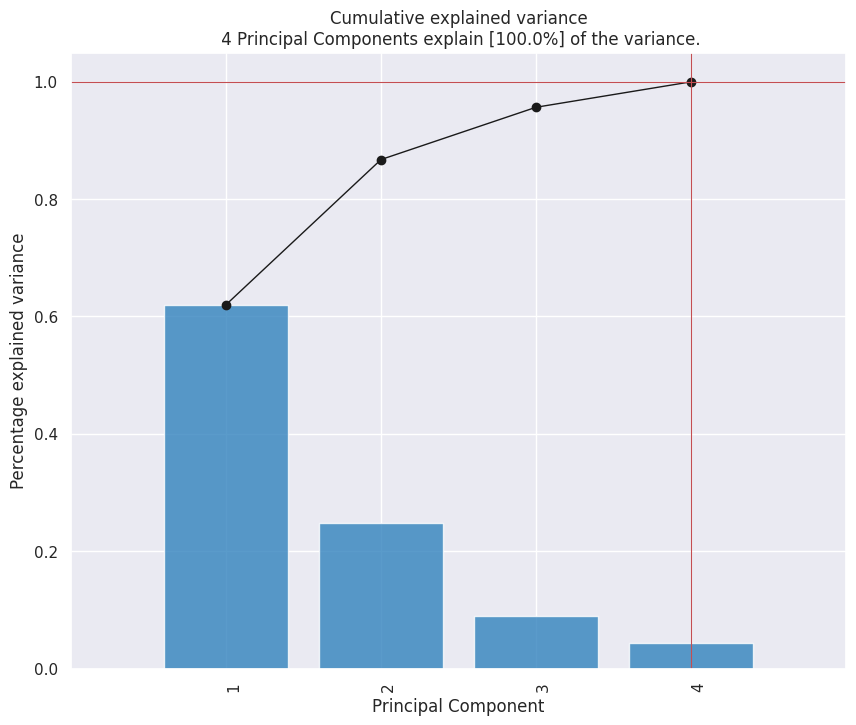

In [13]:
model.plot(figsize=(10,8))
plt.show()

---
## Biplot

Biplot displays both the PC scores and PC loadings. We will use the **pca.biplot_** method from the **pca** library.

[26-09-2025 14:21:17] [pca.pca] [INFO] Plot PC1 vs PC2 with loadings.
[26-09-2025 14:21:17] [scatterd.scatterd] [INFO] Create scatterplot


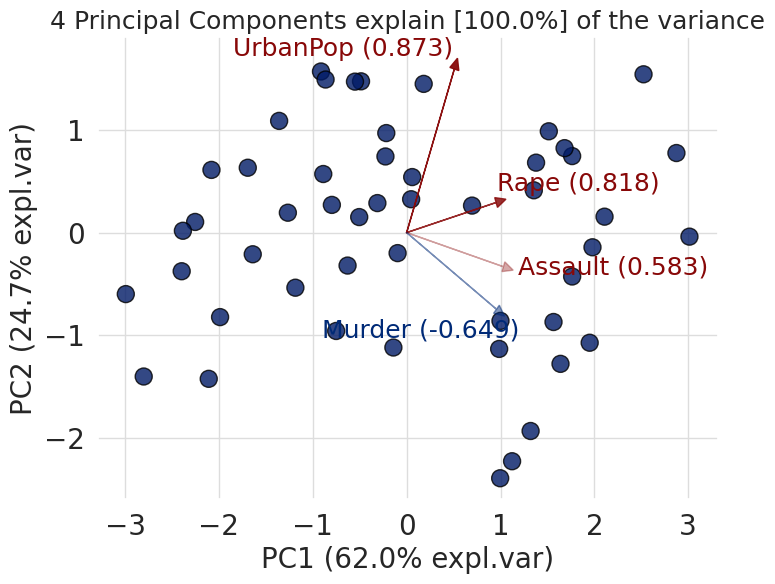

In [14]:
model.biplot(figsize=(8,6))
plt.show()

[26-09-2025 14:21:23] [pca.pca] [INFO] Plot PC1 vs PC2 vs PC3 with loadings.
[26-09-2025 14:21:23] [scatterd.scatterd] [INFO] Create scatterplot


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (62.0% expl.var)', ylabel='PC2 (24.7% expl.var)', zlabel='PC3 (8.91% expl.var)'>)

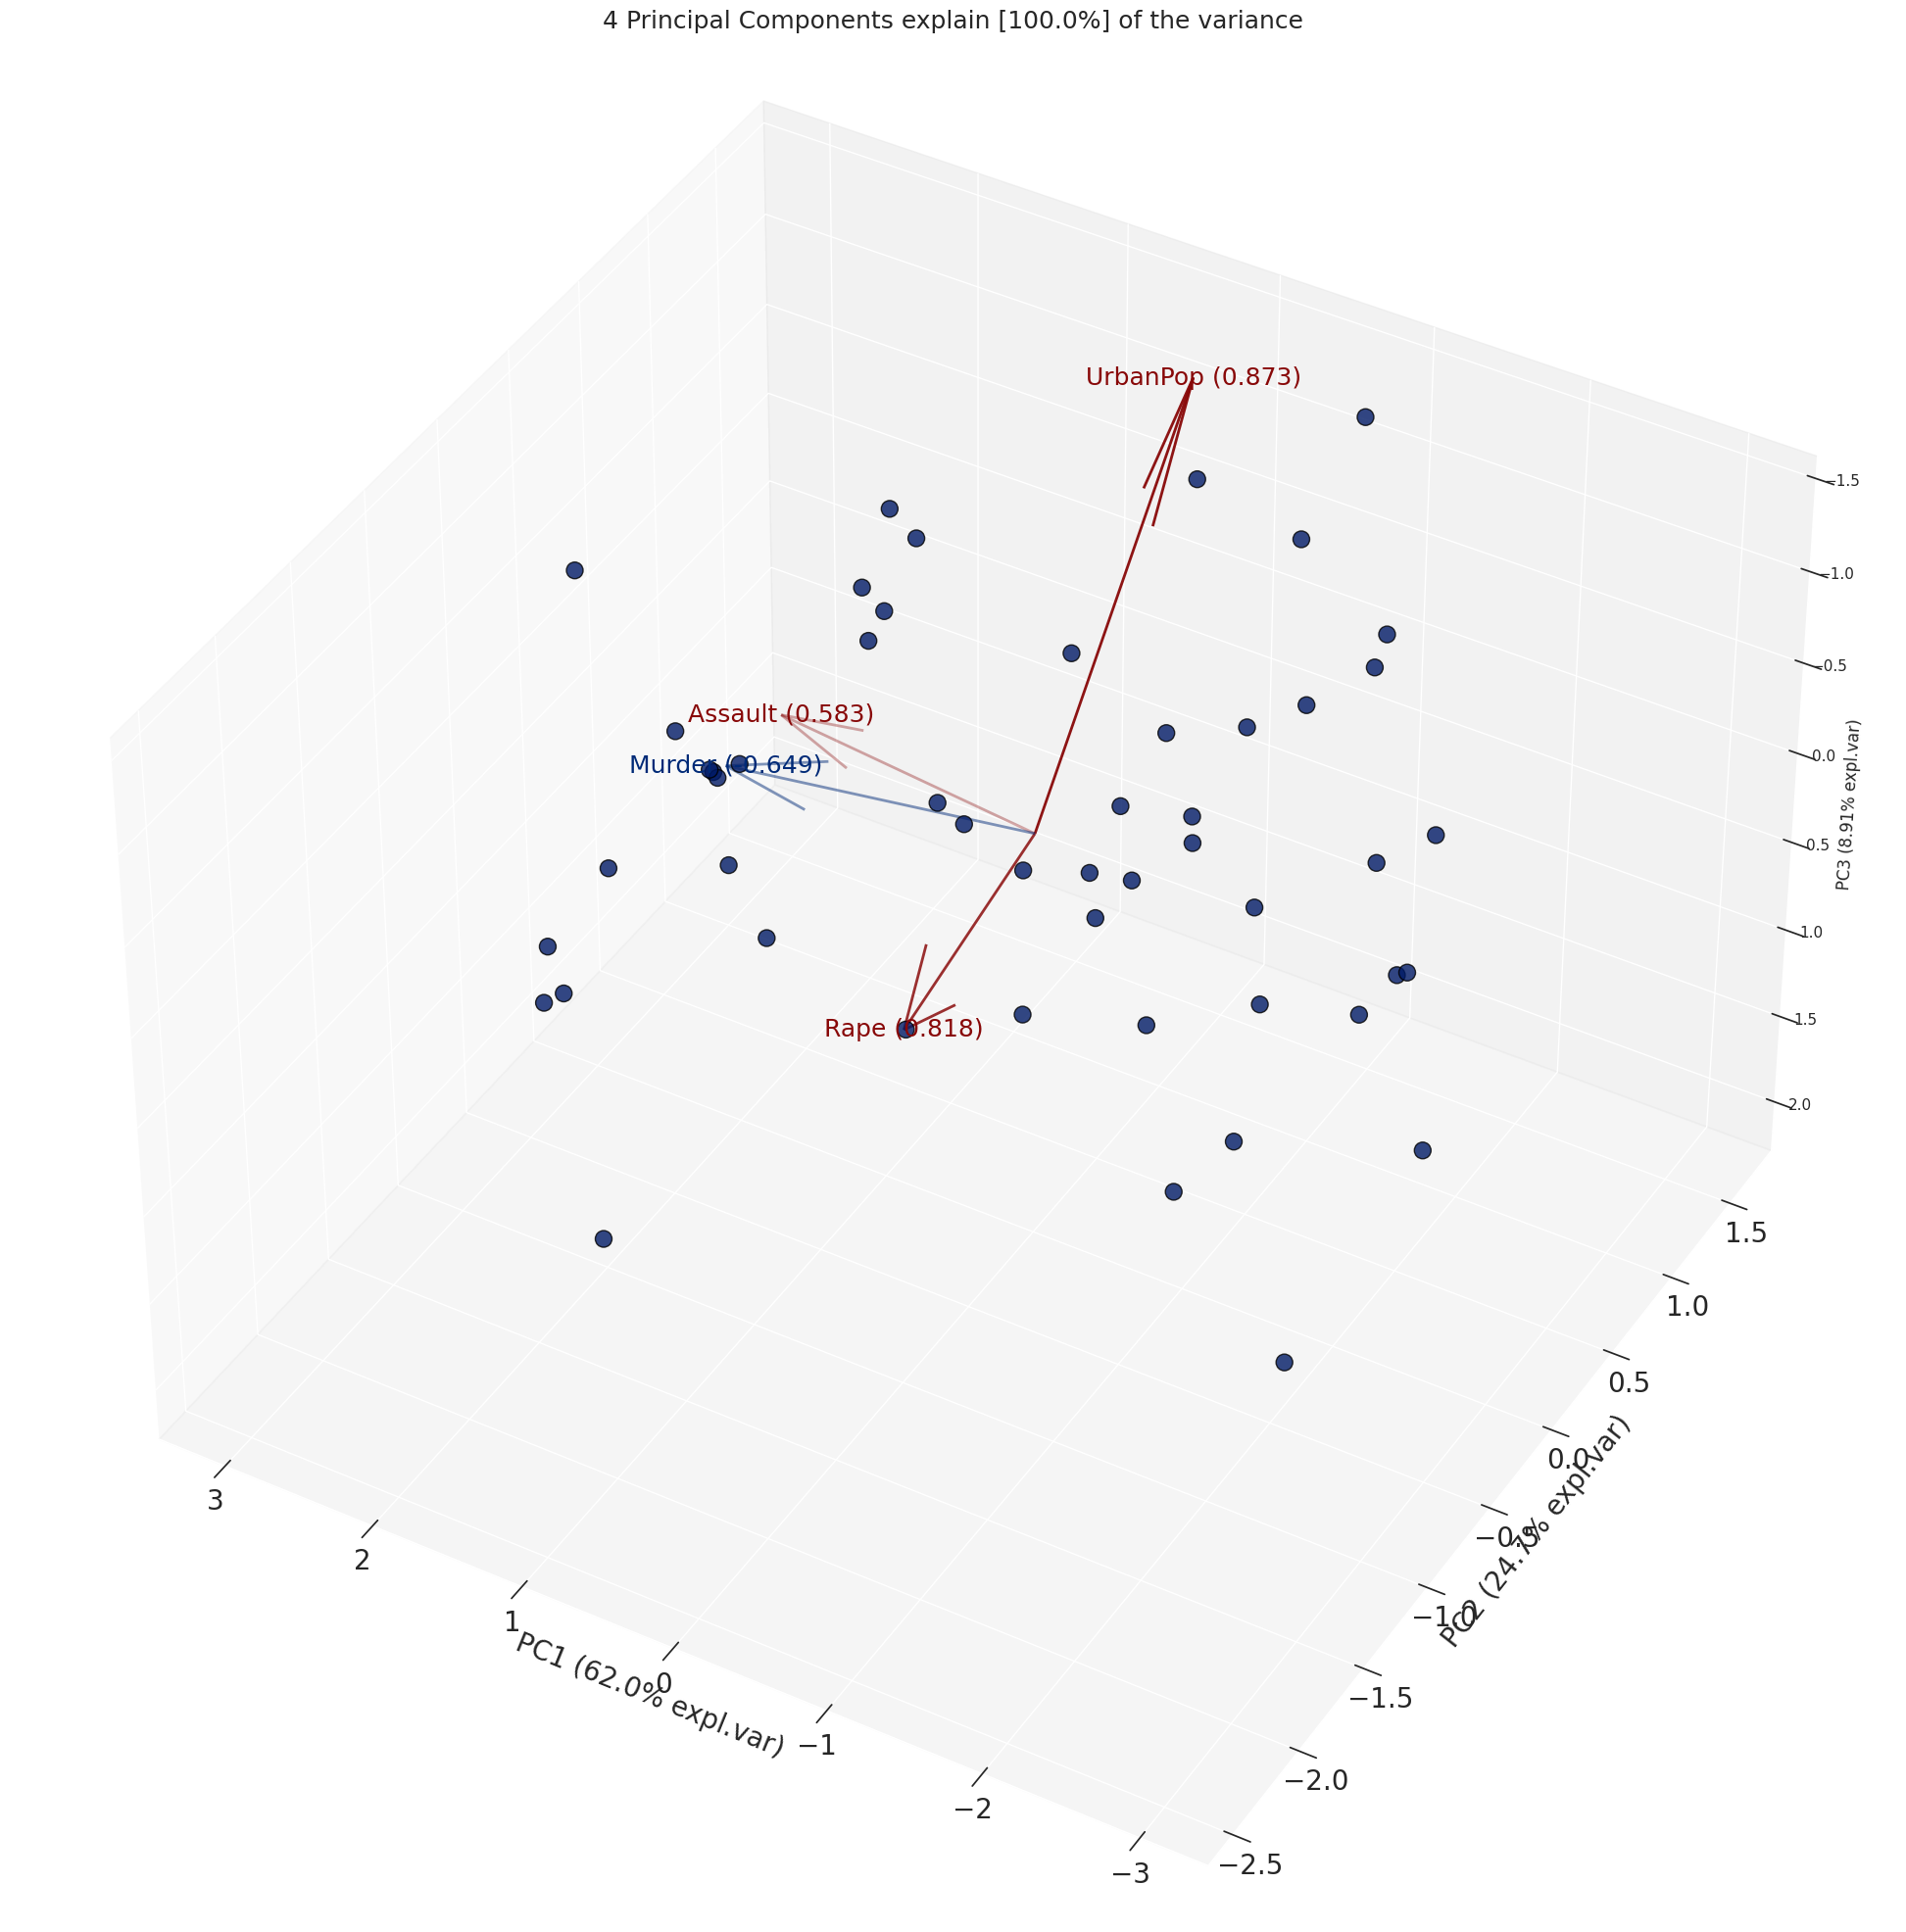

In [15]:
model.biplot3d()

In [16]:
loadings.T

,PC1,PC2,PC3,PC4
Murder,0.535899,-0.418181,-0.341233,-0.649228
Assault,0.583184,-0.187986,-0.268148,0.743407
UrbanPop,0.278191,0.872806,-0.378016,-0.133878
Rape,0.543432,0.167319,0.817778,-0.089024


---
## PCA application: Market Data

In [17]:
df = pd.read_csv('market_data.csv')

In [18]:
df.head()

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
0,72,1/31/2018,0.86,0.85,0.86,0.90,0.84,0.01,0.17,0.09,...,0.54,0.85,1.00,0.99,0.22,0.83,-0.022,-0.078,0.001,0.000
1,78,1/31/2018,0.66,0.67,0.66,0.37,0.92,0.01,0.25,0.58,...,0.27,0.65,1.00,1.00,0.04,0.17,0.006,0.047,0.264,0.000
2,465,1/31/2018,0.57,0.65,0.64,0.71,0.18,0.01,0.35,0.46,...,0.18,0.61,1.00,1.00,0.99,1.00,0.033,0.095,0.393,-0.502
3,486,1/31/2018,0.48,0.52,0.50,0.36,0.30,0.01,0.81,0.81,...,0.70,0.85,0.99,0.99,0.96,0.98,-0.139,0.146,0.030,-0.463
4,552,1/31/2018,0.88,0.87,0.87,0.88,0.75,0.01,0.81,0.77,...,0.64,0.81,0.99,0.99,0.92,0.74,-0.044,-0.307,-0.349,-0.403


In [19]:
df.shape

(4451, 99)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4451 entries, 0 to 4450
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   stock_id                        4451 non-null   int64  
 1   date                            4451 non-null   object 
 2   Advt_12M_Usd                    4451 non-null   float64
 3   Advt_3M_Usd                     4451 non-null   float64
 4   Advt_6M_Usd                     4451 non-null   float64
 5   Asset_Turnover                  4451 non-null   float64
 6   Bb_Yld                          4451 non-null   float64
 7   Bv                              4451 non-null   float64
 8   Capex_Ps_Cf                     4451 non-null   float64
 9   Capex_Sales                     4451 non-null   float64
 10  Cash_Div_Cf                     4451 non-null   float64
 11  Cash_Per_Share                  4451 non-null   float64
 12  Cf_Sales                        44

In [21]:
df.dropna(inplace=True)

In [22]:
X= df.drop(['stock_id','date'], axis=1) # scaling the features will be automatically done.

In [23]:
model=pca(n_components=0.8, normalize=True)

In [24]:
results = model.fit_transform(X)

[26-09-2025 14:22:30] [pca.pca] [INFO] Extracting column labels from dataframe.
[26-09-2025 14:22:30] [pca.pca] [INFO] Extracting row labels from dataframe.
[26-09-2025 14:22:30] [pca.pca] [INFO] Normalizing input data per feature (zero mean and unit variance)..
[26-09-2025 14:22:30] [pca.pca] [INFO] PCA reduction performed to capture 80.0% explained variance using 97 columns of the input data.
[26-09-2025 14:22:30] [pca.pca] [INFO] Fit using PCA.
[26-09-2025 14:22:30] [pca.pca] [INFO] Compute loadings and PCs.
[26-09-2025 14:22:30] [pca.pca] [INFO] Compute explained variance.
[26-09-2025 14:22:30] [pca.pca] [INFO] Number of components is 14 that covers 80.00% explained variance.
[26-09-2025 14:22:30] [pca.pca] [INFO] The PCA reduction is performed on the 97 columns of the input dataframe.
[26-09-2025 14:22:30] [pca.pca] [INFO] Fit using PCA.
[26-09-2025 14:22:30] [pca.pca] [INFO] Compute loadings and PCs.
[26-09-2025 14:22:30] [pca.pca] [INFO] Outlier detection using Hotelling T2 test

In [25]:
results

{'loadings':       Advt_12M_Usd  Advt_3M_Usd  Advt_6M_Usd  Asset_Turnover    Bb_Yld  \
 PC1       0.123418     0.126343     0.125503        0.020272  0.063947   
 PC2       0.138670     0.130818     0.133819       -0.044864  0.013430   
 PC3       0.124841     0.124347     0.125028        0.270337  0.046423   
 PC4       0.020009     0.016622     0.017209       -0.084316 -0.015865   
 PC5      -0.145089    -0.163347    -0.157988        0.090042  0.002189   
 PC6      -0.078588    -0.058823    -0.066670       -0.109737 -0.078355   
 PC7       0.037798     0.025136     0.031062       -0.105942 -0.045135   
 PC8      -0.001204    -0.015454    -0.008940       -0.016327 -0.012766   
 PC9       0.020210     0.028529     0.025605       -0.010077 -0.044494   
 PC10     -0.121688    -0.108998    -0.112908        0.135613 -0.103897   
 PC11      0.062078     0.073017     0.068489       -0.019946 -0.019161   
 PC12     -0.050458    -0.037604    -0.044369        0.019197  0.013284   
 PC13      0.

In [ ]:
loadings=results['loadings']
loadings

,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,Cash_Div_Cf,Cash_Per_Share,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
PC1,0.123418,0.126343,0.125503,0.020272,0.063947,0.011040,0.041722,0.022285,0.035080,0.127626,...,0.076032,0.070140,0.043927,0.045840,-0.090418,-0.095654,-0.004191,-0.006775,-0.004689,-0.001792
PC2,0.138670,0.130818,0.133819,-0.044864,0.013430,-0.048430,0.090063,0.068790,-0.033752,-0.044533,...,0.222852,0.240883,0.213707,0.195219,0.020990,0.015851,0.004126,0.007243,0.007869,0.001106
PC3,-0.124841,-0.124347,-0.125028,-0.270337,-0.046424,0.049457,-0.097444,0.015554,0.120505,-0.022217,...,0.036238,0.033167,0.033519,0.085878,-0.167332,-0.165143,0.005036,0.009050,0.018022,0.019287
PC4,0.020009,0.016622,0.017209,-0.084316,-0.015865,-0.075288,-0.164698,-0.102310,0.012750,0.153057,...,0.026350,0.043163,0.049609,0.050243,0.063363,0.064437,0.044350,0.065487,0.081801,0.055316
PC5,-0.145090,-0.163347,-0.157988,0.090042,0.002176,0.083538,0.180392,-0.036941,0.076477,0.087073,...,0.027948,0.024666,0.041036,0.070703,0.025703,0.003044,0.039437,0.059145,0.066384,0.042991
PC6,0.078588,0.058821,0.066669,0.109739,0.078392,-0.162693,-0.188019,-0.178759,0.150635,-0.115792,...,-0.043352,-0.010279,-0.013416,0.063196,0.000786,-0.022187,-0.023864,-0.026791,-0.023439,-0.018321
PC7,-0.037796,-0.025136,-0.031061,0.105936,0.045183,0.007309,0.043074,-0.093870,0.196792,0.041982,...,0.016150,0.004646,-0.005767,0.013813,-0.242902,-0.256042,-0.018055,-0.019362,-0.001754,0.015606
PC8,0.001207,0.015455,0.008939,0.016310,0.012701,-0.056534,-0.073931,-0.215943,-0.059548,0.182957,...,0.020482,0.028988,-0.036955,0.042452,0.010219,0.037263,-0.020785,-0.023818,-0.035416,-0.039249
PC9,-0.020203,-0.028523,-0.025597,0.010097,0.044520,-0.103882,0.065242,0.061225,0.080193,-0.029352,...,0.021318,0.038678,0.009635,-0.113245,-0.097303,-0.096611,0.107738,0.134663,0.159596,0.108844
PC10,-0.121748,-0.109035,-0.112941,0.135770,-0.103956,-0.239093,-0.178506,-0.163622,0.118302,-0.147971,...,-0.006945,0.078035,0.172319,0.130663,0.019533,0.056563,0.040202,0.047462,0.051269,0.036426


In [26]:
scores=results['PC']
scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,6.363602,6.173358,2.505719,-0.046875,-3.548486,-3.646408,-3.239173,-3.767941,-0.813529,0.403804,1.582883,-0.762027,-0.924854,-0.119034
1,9.523135,2.507746,-1.660606,0.326112,-5.300255,-0.318242,1.242482,-1.599484,-2.907761,-1.440738,-1.284645,1.228221,0.404433,2.652128
2,5.800236,1.898347,2.195353,1.877708,-2.937120,0.332841,3.458999,-3.265723,-1.186501,1.895160,-0.379862,1.993721,0.450553,0.230459
3,0.715543,9.557593,0.380252,3.213813,-1.973123,3.231253,0.847140,-2.958429,-0.090774,0.506512,-0.247061,1.157906,-0.717538,-2.489451
4,9.303851,7.762789,2.299553,-0.555056,-0.338328,-3.320801,-0.366004,-2.617737,-1.731020,-0.665653,2.324380,3.206678,-0.590057,-0.855639


In [27]:
scores.shape

(4450, 14)

---
## Scree plot

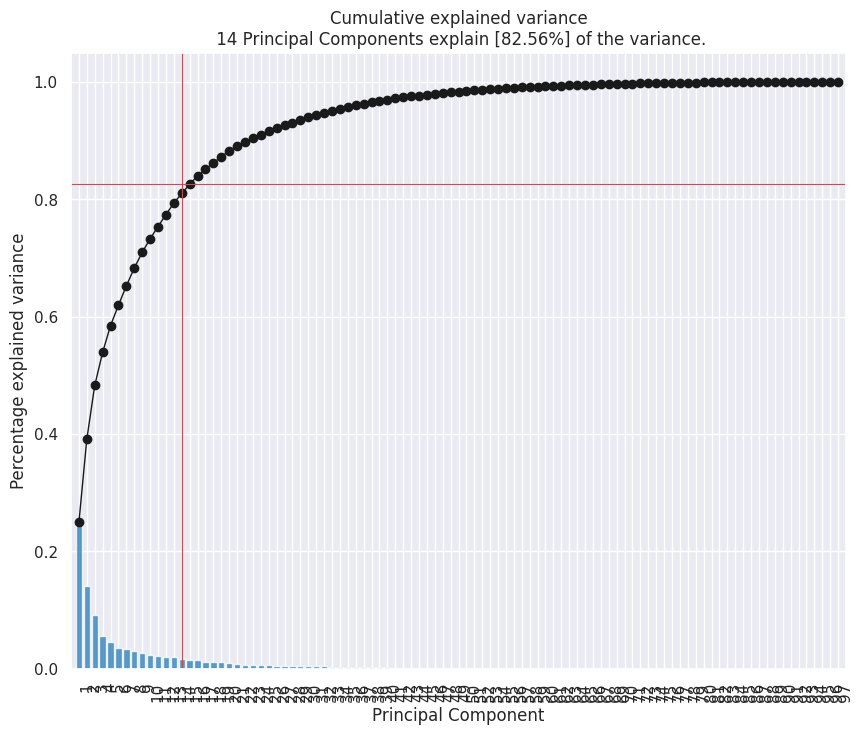

In [28]:
model.plot(figsize=(10,8))
plt.show()

---
###  Additional links:
1. pca Python package documentation: https://pypi.org/project/pca/
2. PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
3. PCA visualization: https://setosa.io/ev/principal-component-analysis/
4. Kernel PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA
5. Kernel PCA visualization: https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py
6. What is Singular Value Decomposition (SVD): https://www.youtube.com/watch?v=mBcLRGuAFUk